# Neural Network

## Basic 2-layer neural network

$y_1 = \sigma (w_1 x + b_1)$

$y_2 = \sigma (w_2 \sigma(w_1 x + b_1) + b_2)$

Sigmoid activation function for each layer



In [35]:
import numpy as np

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
# Define runtime configuration (rc) parameters 
from matplotlib import rcParams
rcParams['figure.figsize'] = 30, 20

In [37]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

def loss(nn, y):
    
    lossf = 0
    n_dim = len(y)
    
    for i in range(3):
        lossf =+ (nn.output[i]-y[i])**2
    
    return float(lossf)

In [38]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

[[0.02098771]
 [0.94567976]
 [0.94703515]
 [0.06611356]]


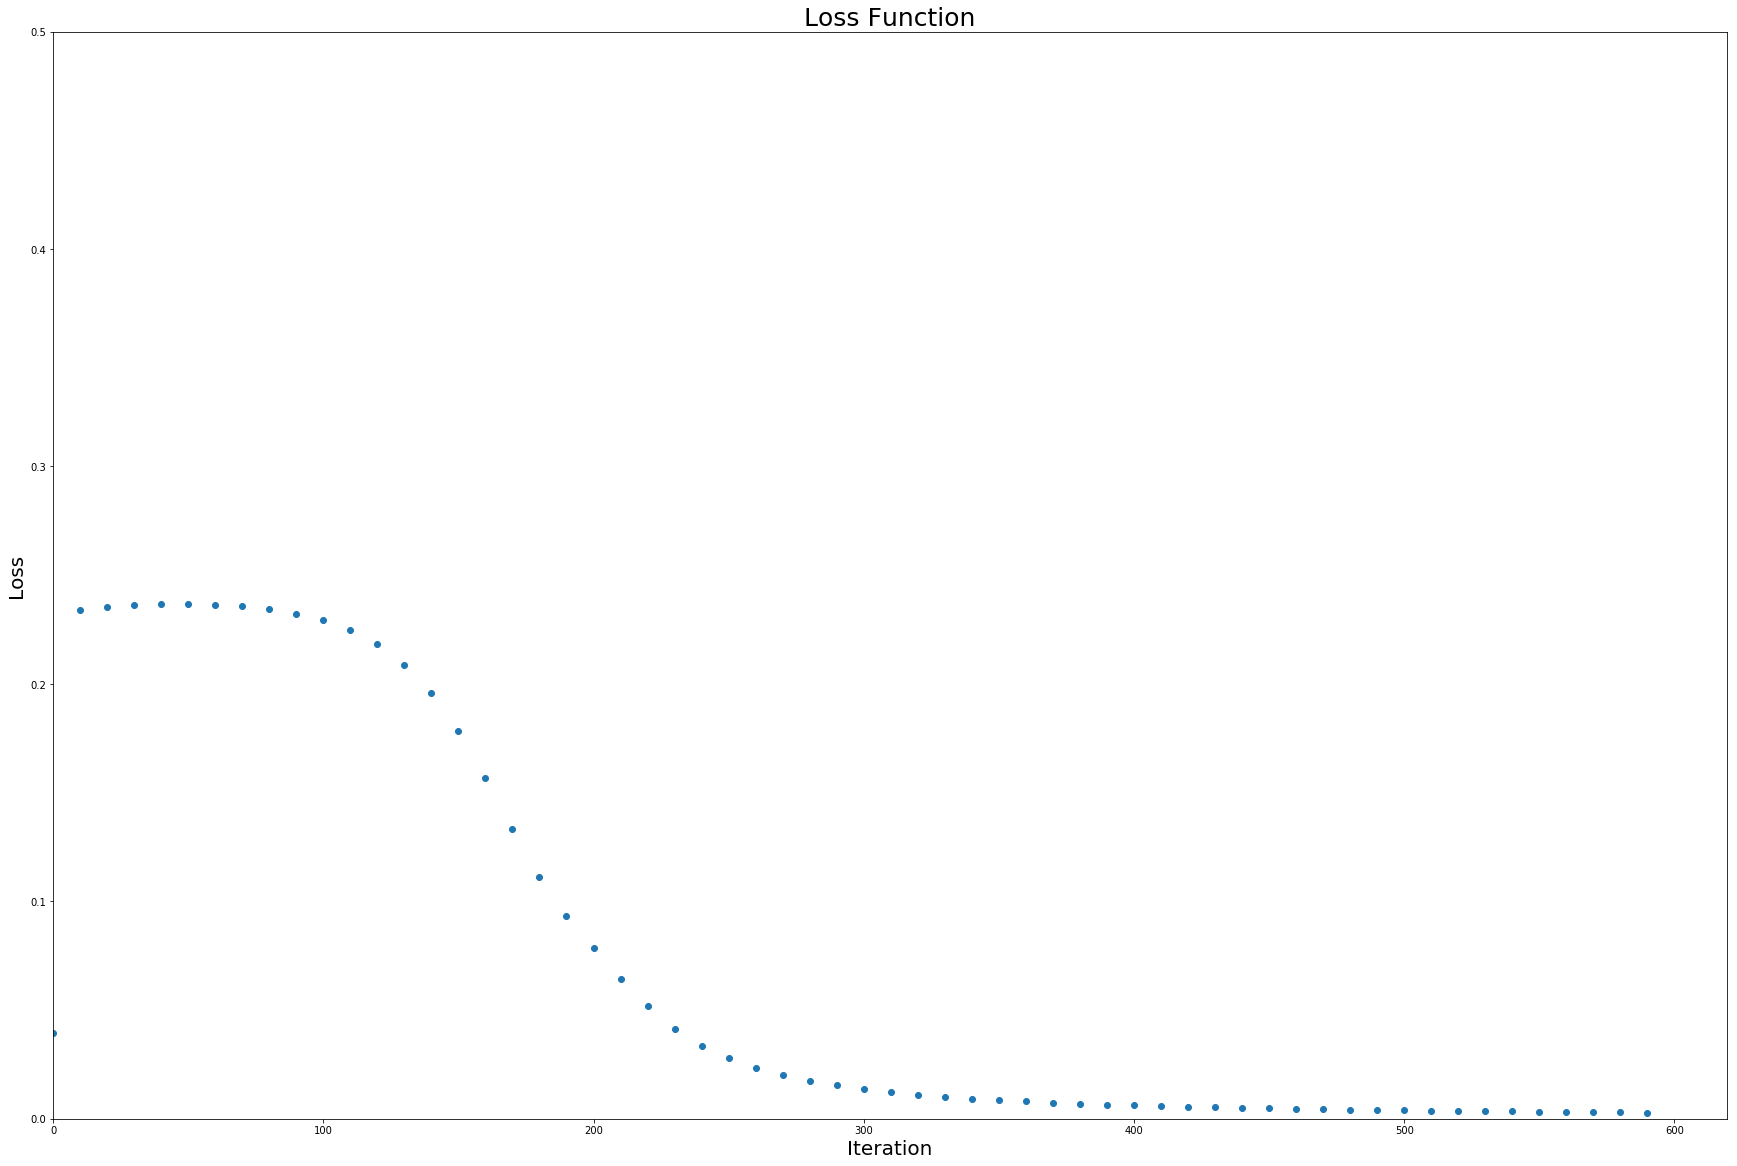

In [44]:
if __name__ == "__main__":
    X = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
    y = np.array([[0],[1],[1],[0]])
    nn = NeuralNetwork(X,y)

    x = []    
    loss_to_plot = []
    
    for i in range(600):
        nn.feedforward()
        nn.backprop()
        
        if i%10 == 0:
            loss_to_plot.append(loss(nn, y))
            x.append(i)
            
    #print(loss_to_plot)   
    
    plt.scatter(x, loss_to_plot)
    plt.xlim(0)
    plt.ylim(0,0.5)
    
    plt.xlabel('Iteration', fontsize= 20)
    plt.ylabel('Loss', fontsize= 20)
    plt.title('Loss Function', fontsize= 25)

    print(nn.output)